In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('LAP.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.drop(['Loan_ID', 'Dependents'], axis = 1, inplace = True)

In [4]:
df.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
df.isnull().sum()

Gender               13
Married               3
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
df.Gender = df.Gender.fillna(df.Gender.mode()[0])
df.Married = df.Married.fillna(df.Married.mode()[0])
df.Self_Employed = df.Self_Employed.fillna(df.Self_Employed.mode()[0])
df.LoanAmount = df.LoanAmount.fillna(df.LoanAmount.mean())
df.Loan_Amount_Term = df.Loan_Amount_Term.fillna(df.Loan_Amount_Term.mode()[0])
df.Credit_History = df.Credit_History.fillna(df.Credit_History.mode()[0])

In [7]:
df.isnull().sum()

Gender               0
Married              0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [8]:
df.head(2)

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N


In [9]:
df = pd.get_dummies(df, columns = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area'])

In [10]:
df.head(3)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,146.412162,360.0,1.0,Y,0,1,1,0,1,0,1,0,0,0,1
1,4583,1508.0,128.000000,360.0,1.0,N,0,1,0,1,1,0,1,0,1,0,0
2,3000,0.0,66.000000,360.0,1.0,Y,0,1,0,1,1,0,0,1,0,0,1


In [11]:
df.Loan_Status = df.Loan_Status.map({'Y' : 1, 'N' : 0})

In [12]:
df.head(3)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,146.412162,360.0,1.0,1,0,1,1,0,1,0,1,0,0,0,1
1,4583,1508.0,128.000000,360.0,1.0,0,0,1,0,1,1,0,1,0,1,0,0
2,3000,0.0,66.000000,360.0,1.0,1,0,1,0,1,1,0,0,1,0,0,1


In [13]:
X = df.drop('Loan_Status', axis = 1)
y = df.Loan_Status

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [15]:
len(X_train), len(X_test)

(460, 154)

In [16]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [17]:
model.fit(X_train, y_train)

LogisticRegression()

In [18]:
model.score(X_test, y_test)

0.7792207792207793

In [19]:
y_pred = model.predict(X_test)

In [20]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

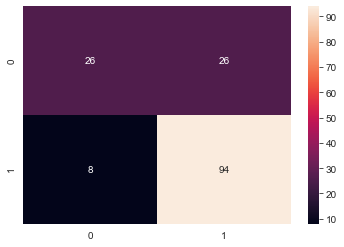

In [21]:
sns.heatmap(cm, annot = True)